<a href="https://colab.research.google.com/github/sun-fox/GluonCV-Mxnet/blob/master/Common_NDArray_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install mxnet-cu101mkl
!pip install gluoncv

     |████████████████████████████████| 711.0MB 27kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
from mxnet import nd
import mxnet as mx
import numpy as np
import time

In [5]:
nd.array(((1,2,3),(4,5,6)))


[[1. 2. 3.]
 [4. 5. 6.]]
<NDArray 2x3 @cpu(0)>

In [6]:
y = nd.random.uniform(low=-1, high=1, shape=(2,3))
y


[[0.09762704 0.18568921 0.43037868]
 [0.6885315  0.20552671 0.71589124]]
<NDArray 2x3 @cpu(0)>

In [7]:
x = nd.random.uniform(low=-1, high=1, shape=(2,3))
(x.shape, x.size, x.dtype, x.context)

((2, 3), 6, numpy.float32, cpu(0))

".dtype=np.xxx" allows me to create an ndarray of the xxx data type

".astype(np.xxxx)"allows ud to convert the datatype of the ndarray to any other compatible datatype

In [8]:
nd.ones((2,3),dtype=np.uint8)


[[1 1 1]
 [1 1 1]]
<NDArray 2x3 @cpu(0)>

In [9]:
y.astype(np.float16)


[[0.09766 0.1857  0.4304 ]
 [0.6885  0.2056  0.716  ]]
<NDArray 2x3 @cpu(0)>

In [10]:
nd.ones((2,3), ctx=mx.cpu())


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

MXNet allows us to do an operation over an ndarray in the gpu memory using the same API, with ctx parameter exchange

In [11]:
nd.ones((2,3), ctx=mx.gpu())


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @gpu(0)>

Comparing the speed of ndarray creation on different hardware networks.

In [0]:
x_np, y_np = np.ones((10000,5000)),np.ones((5000,10000))
x_np_cpu, y_np_cpu = nd.ones((10000,5000),ctx=mx.cpu()),nd.ones((5000,10000),ctx=mx.cpu())
x_np_gpu, y_np_gpu = nd.ones((10000,5000),ctx=mx.gpu()),nd.ones((5000,10000),ctx=mx.gpu())

In [13]:
tic = time.time()
np.dot(x_np, y_np)
print("Numpy time {:.4f}s".format(time.time()-tic))

Numpy time 27.9344s


In [14]:
tic = time.time()
nd.dot(x_np_cpu, y_np_cpu).wait_to_read()
print("MXNet CPU time {:.4f}s".format(time.time()-tic))

MXNet CPU time 12.7591s


In [15]:
tic = time.time()
nd.dot(x_np_gpu, y_np_gpu).wait_to_read()
print("MXNet GPU time {:.4f}s".format(time.time()-tic))

MXNet GPU time 0.1345s


Conversion between MXNet NDArray and NumPy

'.asnumpy()' function is synchronous in nature

In [16]:
a = x.asnumpy()
(type(a),a)

(numpy.ndarray, array([[ 0.08976638,  0.6945034 , -0.15269041],
        [ 0.24712741,  0.29178822, -0.23123658]], dtype=float32))

In [17]:
nd.array(a,ctx=mx.gpu(0))


[[ 0.08976638  0.6945034  -0.15269041]
 [ 0.24712741  0.29178822 -0.23123658]]
<NDArray 2x3 @gpu(0)>

**Common ND Array operations**

In [19]:
x = mx.nd.random.uniform(shape=(2,3))
y = mx.nd.full(shape=(2,3), val=2)
x, y

(
 [[0.4375872  0.2975346  0.891773  ]
  [0.05671298 0.96366274 0.2726563 ]]
 <NDArray 2x3 @cpu(0)>, 
 [[2. 2. 2.]
  [2. 2. 2.]]
 <NDArray 2x3 @cpu(0)>)

In [20]:
x*y


[[0.8751744  0.5950692  1.783546  ]
 [0.11342596 1.9273255  0.5453126 ]]
<NDArray 2x3 @cpu(0)>

In [22]:
x.exp()


[[1.5489653 1.346535  2.439451 ]
 [1.058352  2.62128   1.3134487]]
<NDArray 2x3 @cpu(0)>

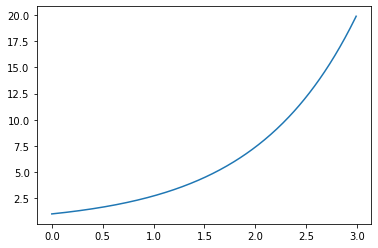

In [25]:
import matplotlib.pyplot as plt
o = plt.plot(np.arange(0,3,0.01), nd.arange(0,3,0.01).exp().asnumpy())

In [27]:
nd.dot(x,y.T)


[[3.2537897 3.2537897]
 [2.586064  2.586064 ]]
<NDArray 2x2 @cpu(0)>

In [28]:
x


[[0.4375872  0.2975346  0.891773  ]
 [0.05671298 0.96366274 0.2726563 ]]
<NDArray 2x3 @cpu(0)>

In [29]:
x[:,1:3]


[[0.2975346  0.891773  ]
 [0.96366274 0.2726563 ]]
<NDArray 2x2 @cpu(0)>

In [30]:
y


[[2. 2. 2.]
 [2. 2. 2.]]
<NDArray 2x3 @cpu(0)>

In [32]:
y[1:2,0:2] = 4
y


[[2. 2. 2.]
 [4. 4. 2.]]
<NDArray 2x3 @cpu(0)>